<a href="https://colab.research.google.com/github/Thirshal03/HOUSE-PRICES/blob/main/fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Dataset Loaded.
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated 

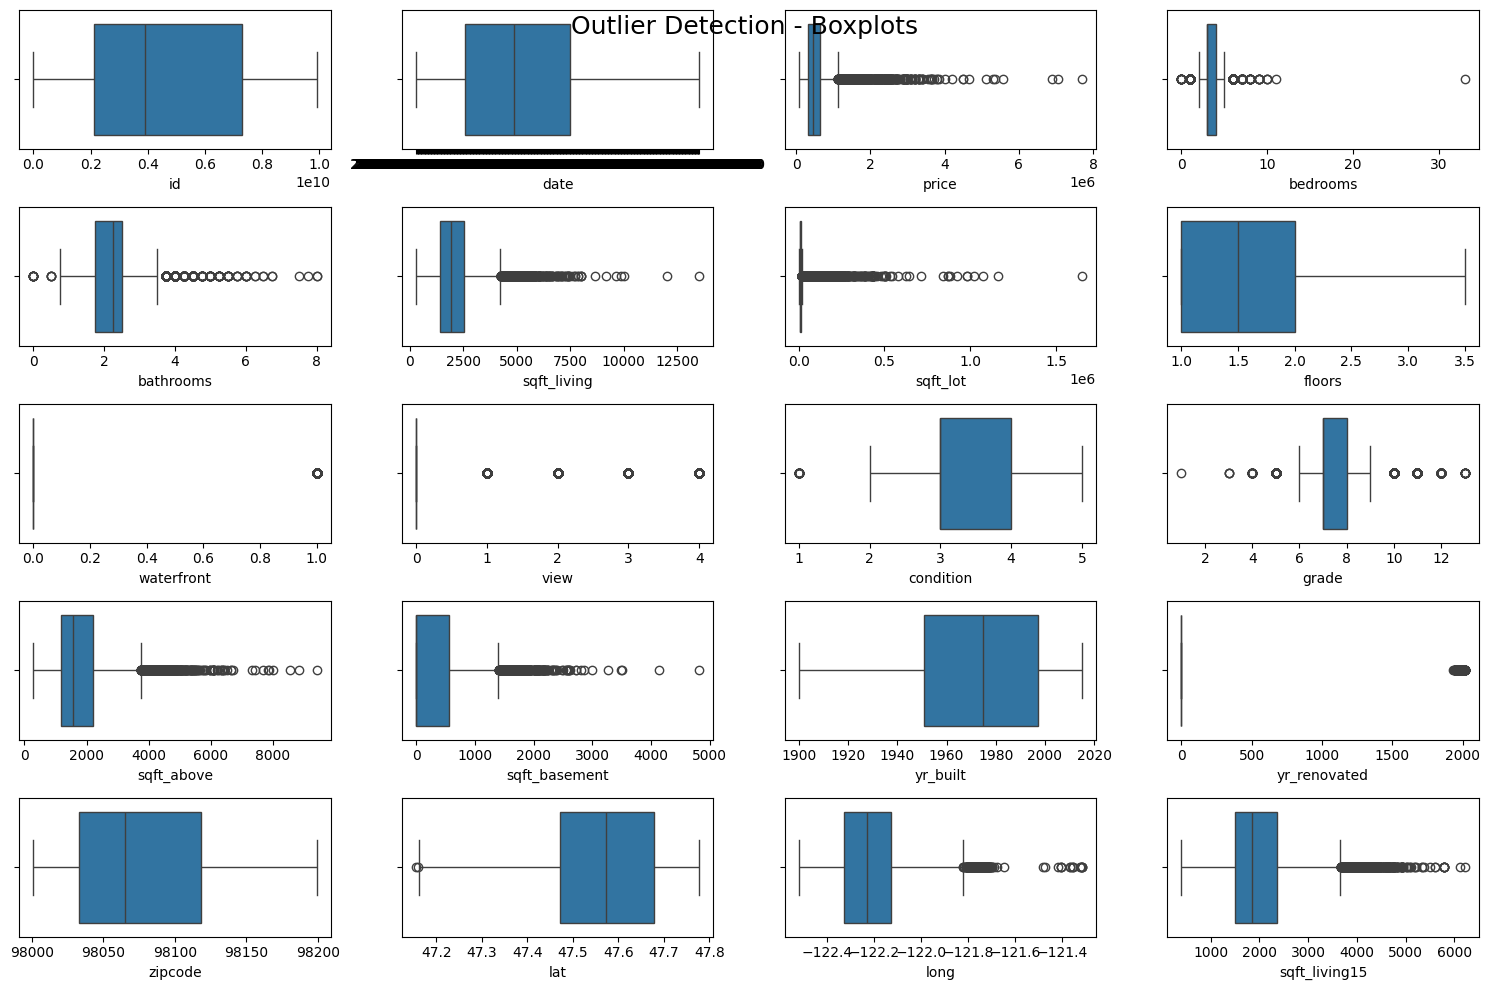


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  floa

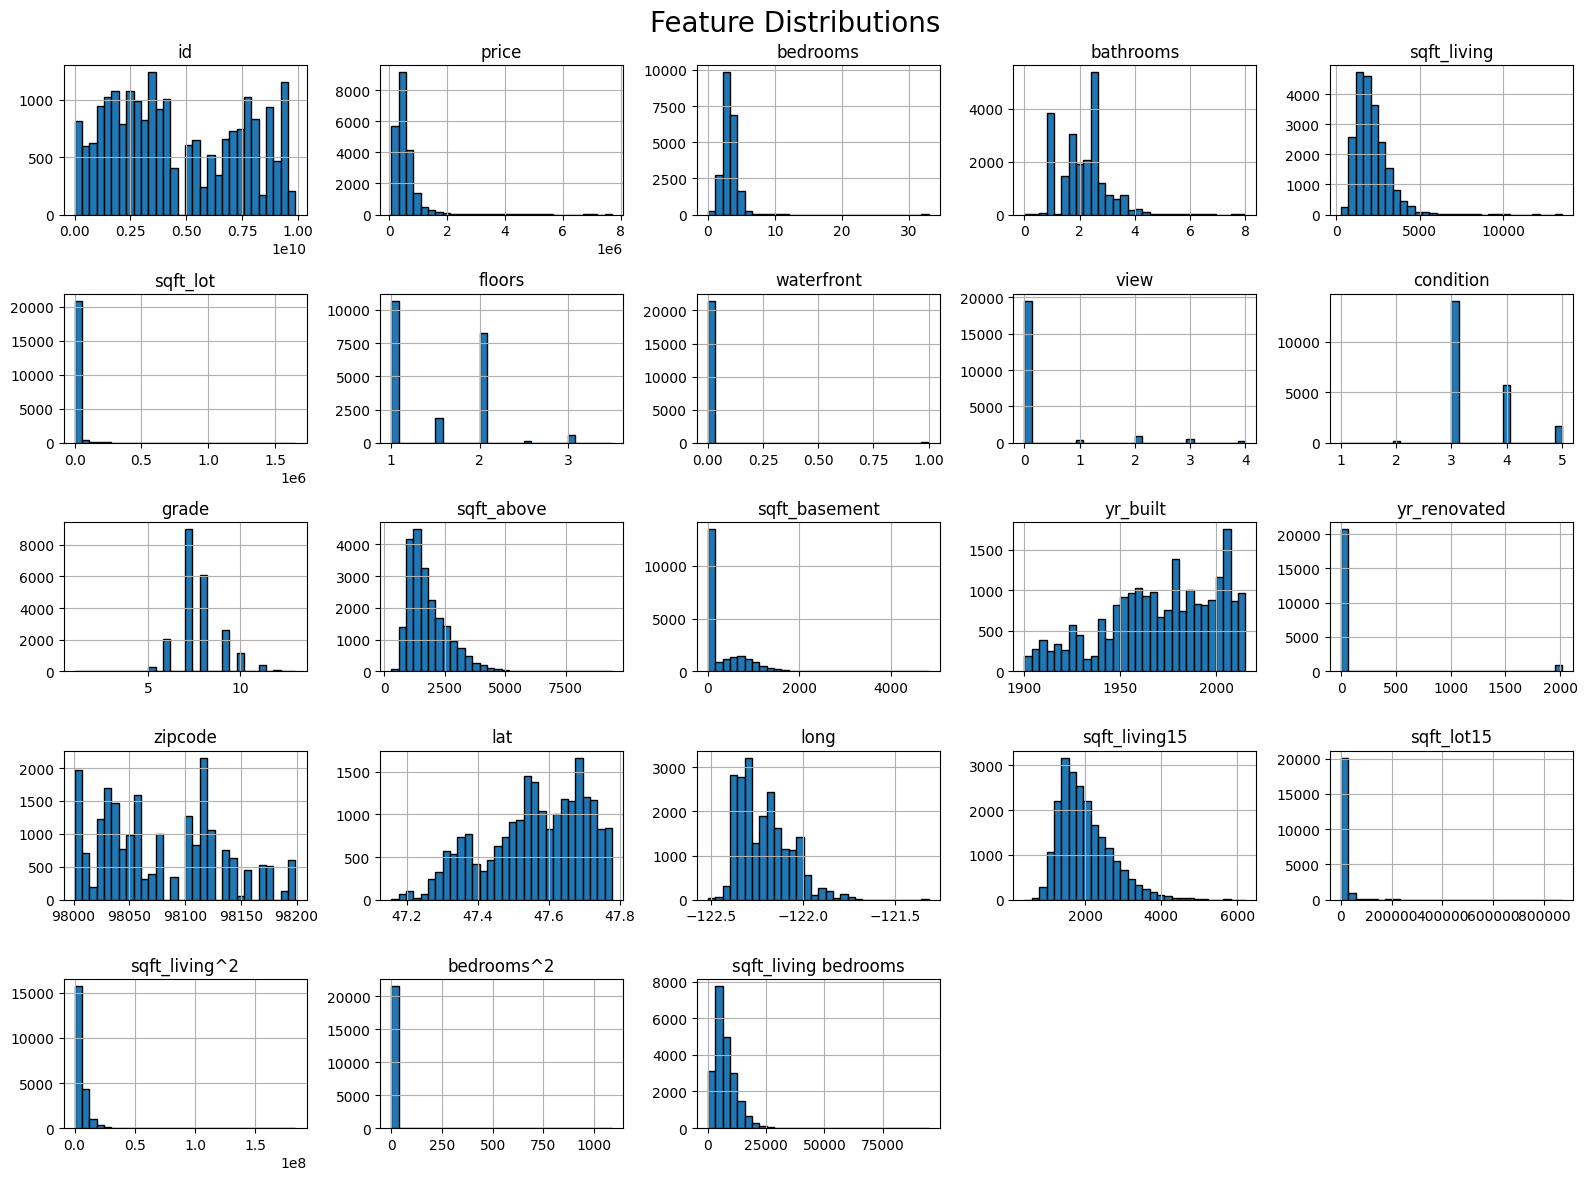

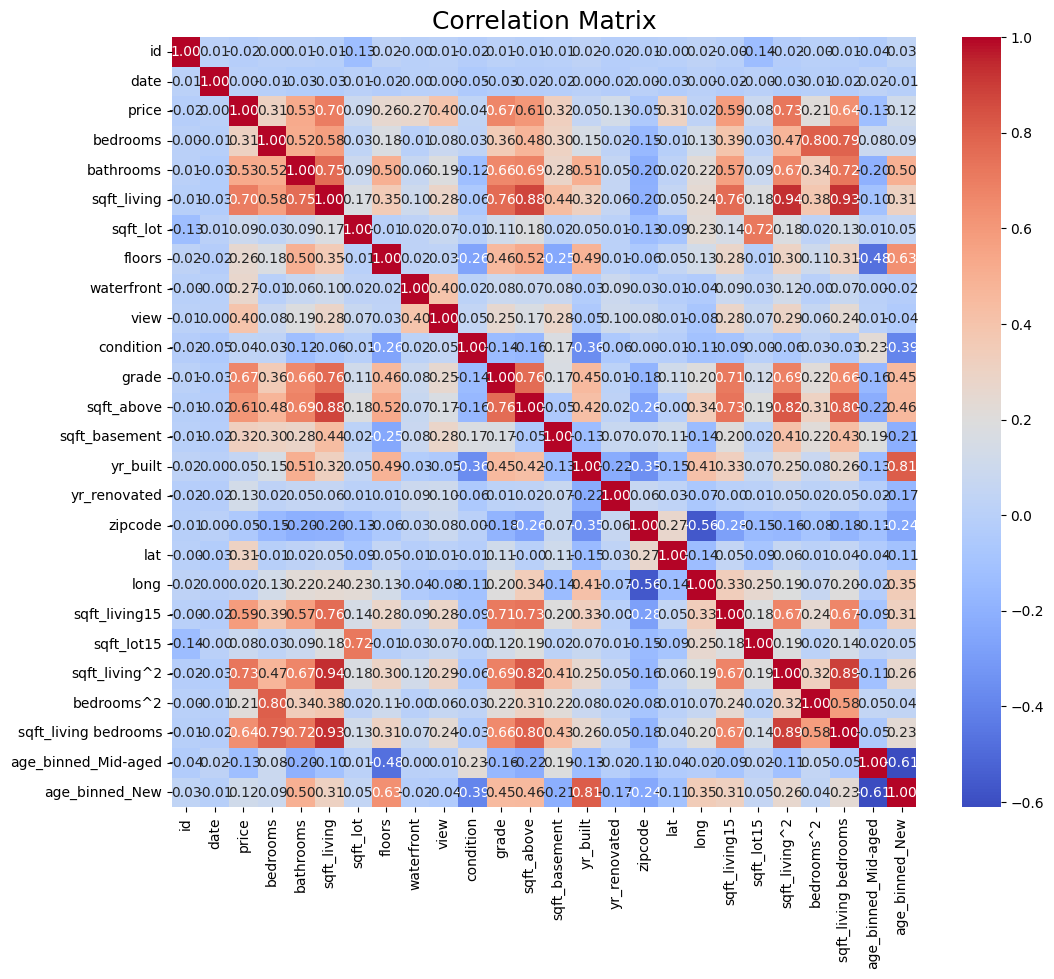

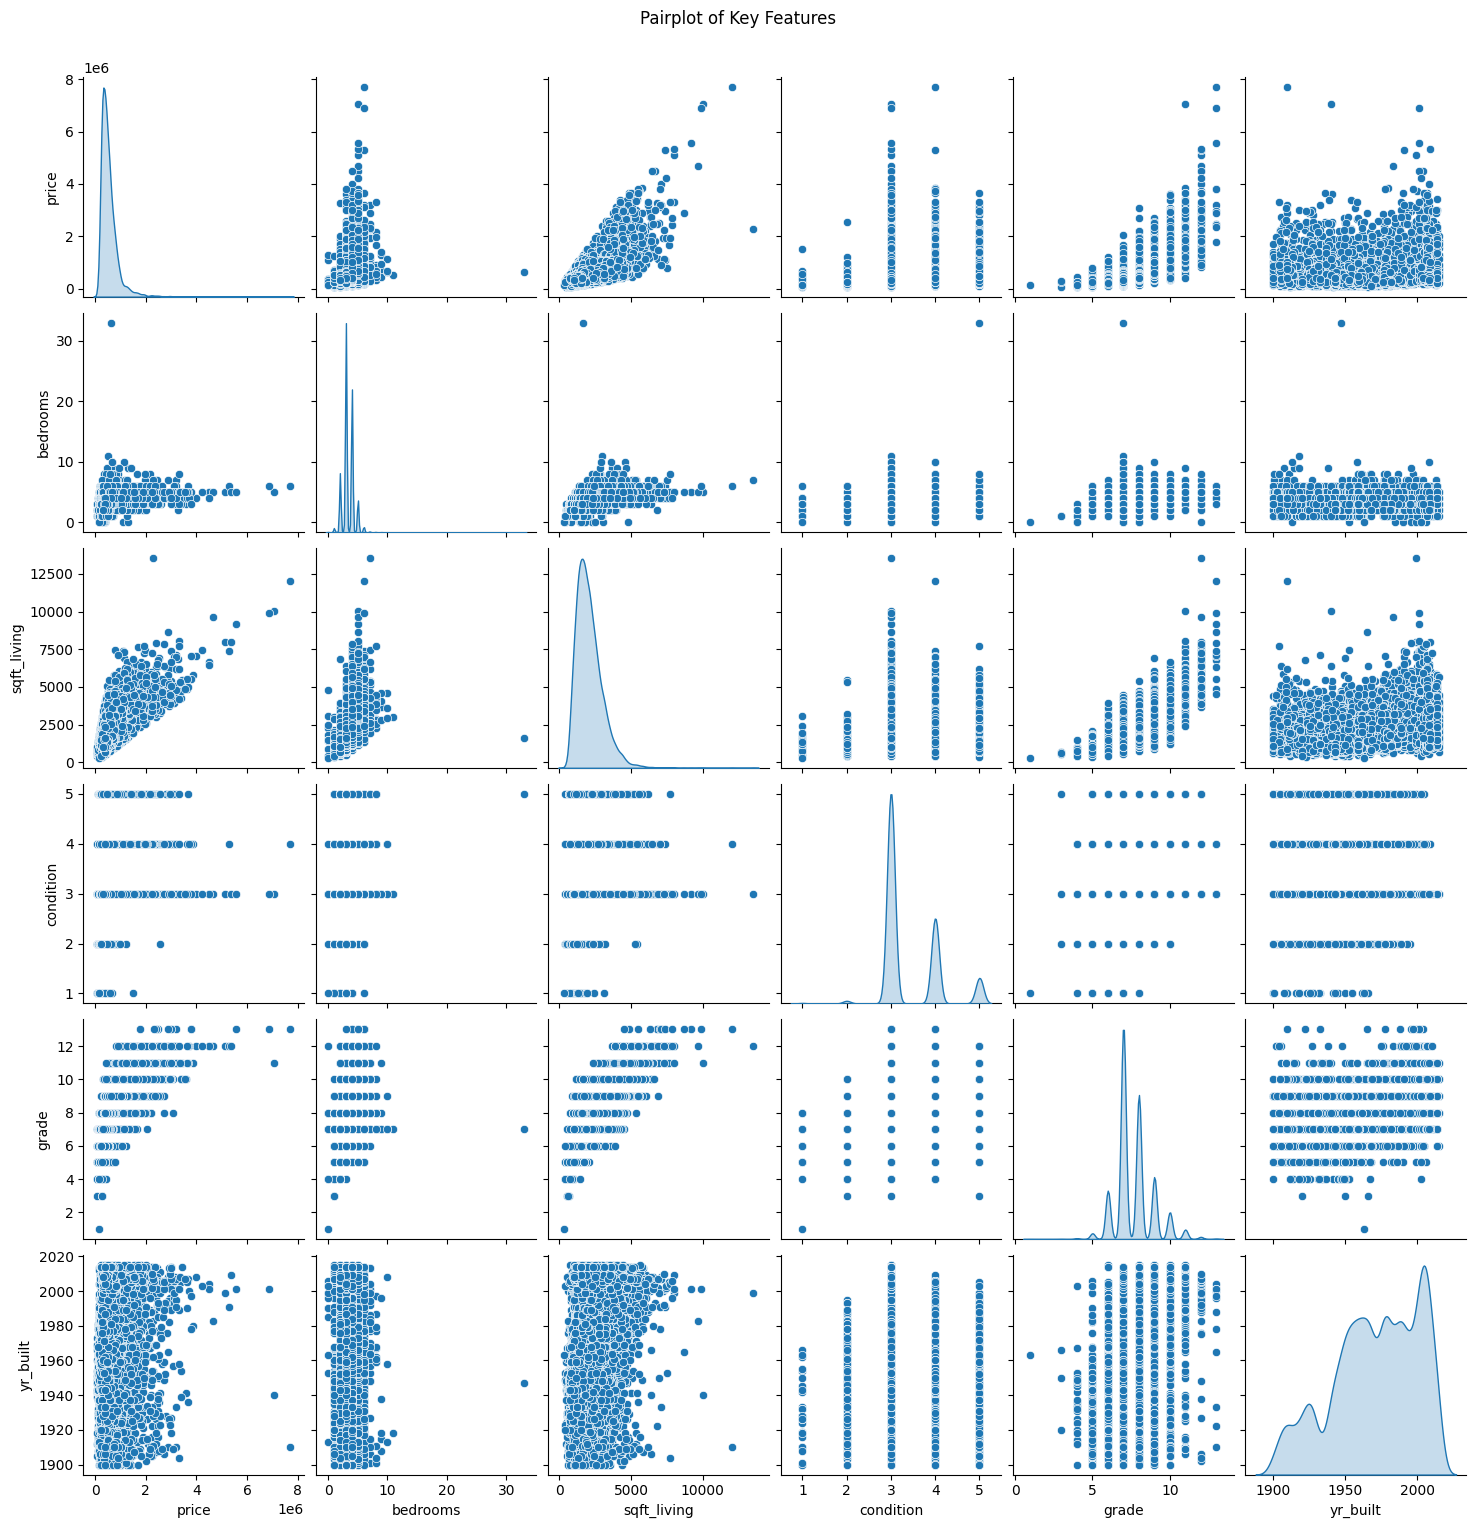

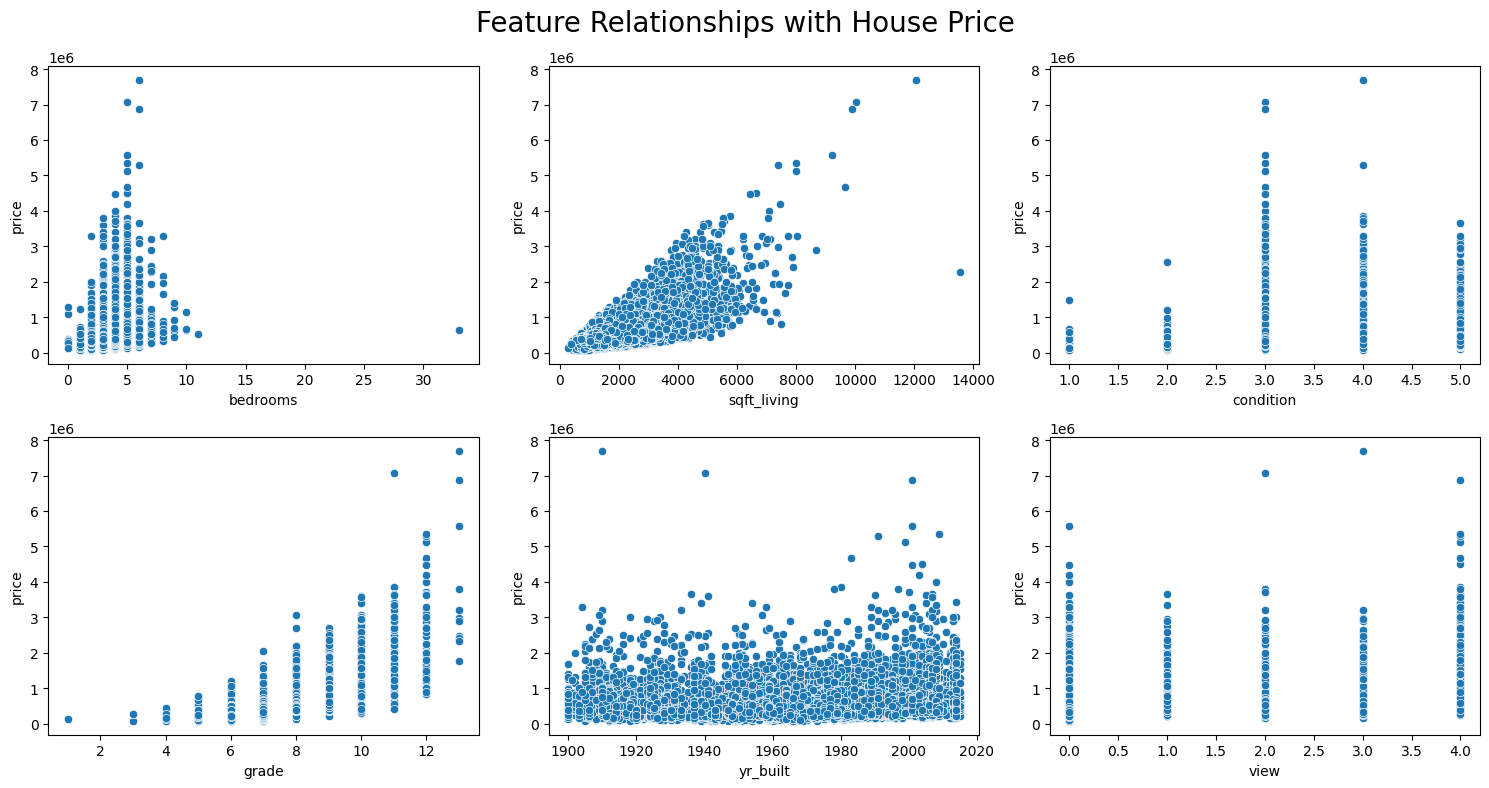

<ipython-input-1-79a07526a50c>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waterfront', y='price', data=df, palette='cool')


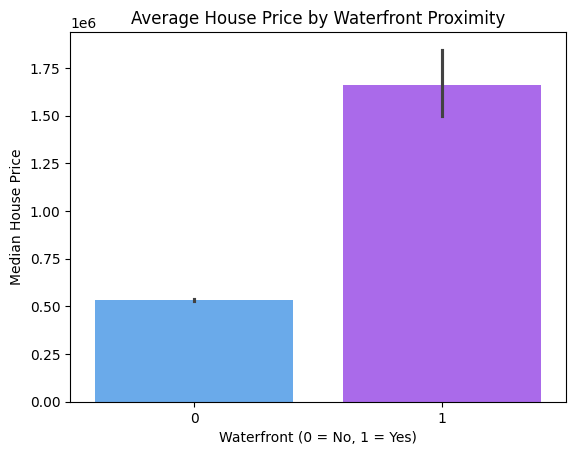

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.728e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(



Linear Regression:
  R² Score: 0.6761
  MAE: 121318.5558
  RMSE: 221267.2042

Ridge Regression:
  R² Score: 0.6762
  MAE: 121315.9202
  RMSE: 221233.9839

Lasso Regression:
  R² Score: 0.6761
  MAE: 121318.4956
  RMSE: 221266.7785

Random Forest:
  R² Score: 0.8434
  MAE: 73202.9742
  RMSE: 153875.8659

XGBoost:
  R² Score: 0.8678
  MAE: 70177.4218
  RMSE: 141390.6165

Model Performance Comparison:
Linear Regression --> R²: 0.6761, MAE: 121318.56, RMSE: 221267.20
Ridge Regression --> R²: 0.6762, MAE: 121315.92, RMSE: 221233.98
Lasso Regression --> R²: 0.6761, MAE: 121318.50, RMSE: 221266.78
Random Forest --> R²: 0.8434, MAE: 73202.97, RMSE: 153875.87
XGBoost --> R²: 0.8678, MAE: 70177.42, RMSE: 141390.62


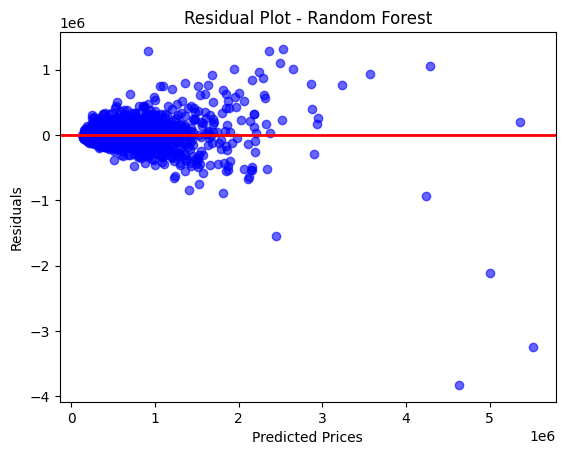

<ipython-input-1-79a07526a50c>:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


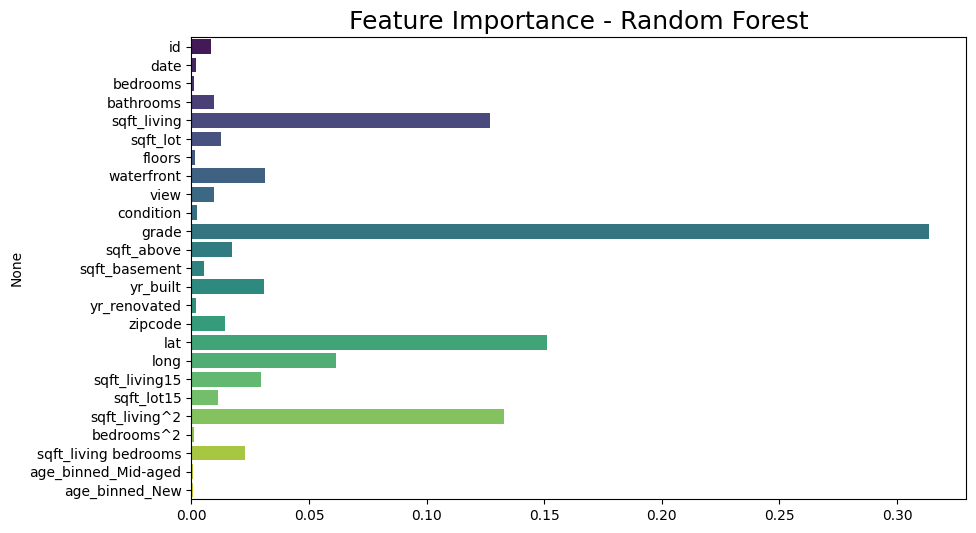

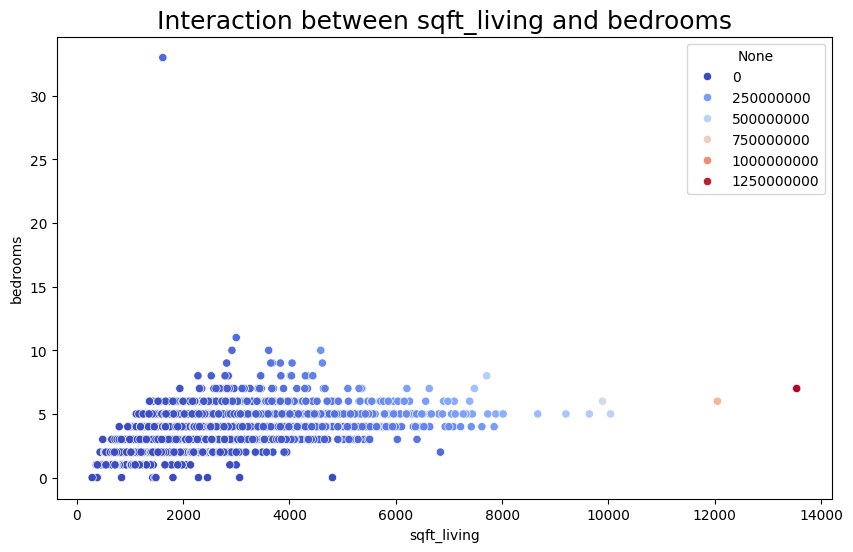

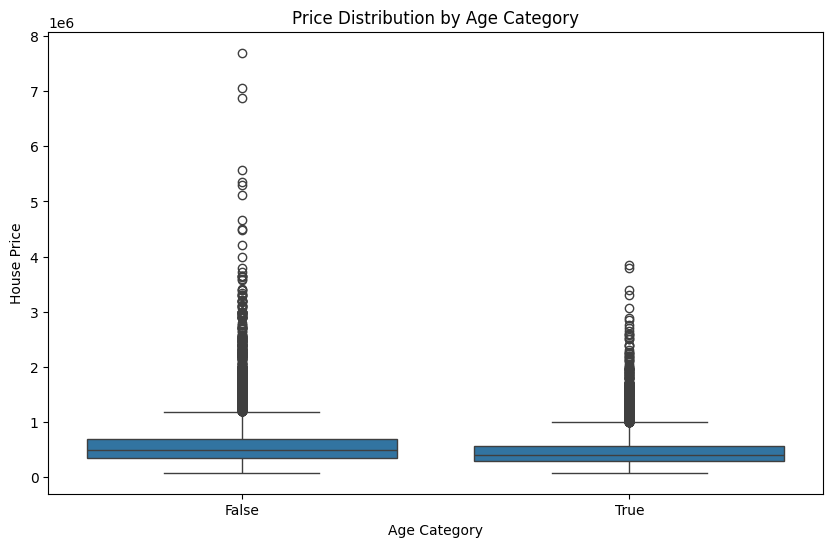

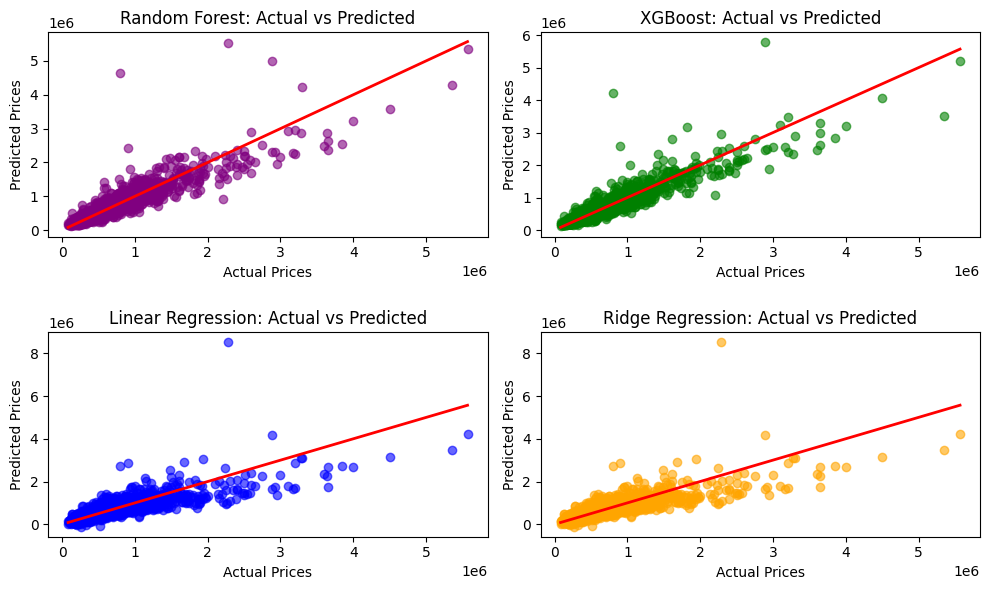

In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the correct URL for the kc_house_data.csv file
url = 'https://raw.githubusercontent.com/asha-hiremath04/House-Price-Prediction-Project/refs/heads/main/kc_house_data.csv'

df = pd.read_csv(url)
print("Initial Dataset Loaded.")
print(df.head())
# Corrected 'rint' to 'print'
print("\nMissing Values Check:\n", df.isnull().sum())
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Outlier visualization
plt.figure(figsize=(15, 10))
# Calculate num_rows dynamically based on the number of columns
num_cols = len(df.columns[:-1])  # Number of columns (excluding the last)
num_rows = (num_cols + 3) // 4   # Number of rows needed, rounded up
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(num_rows, 4, i) # Adjust the subplot grid dynamically
    sns.boxplot(data=df, x=col)
    plt.tight_layout()
plt.suptitle("Outlier Detection - Boxplots", fontsize=18)
plt.show()
print("\nDataset Info:")
print(df.info())

# Check if 'dis' and 'rad' columns exist before creating the new feature.
if 'dis' in df.columns and 'rad' in df.columns:
    # Distance to employment centers ratio
    df['dis_per_rad'] = df['dis'] / df['rad']  # accessibility vs. distance to employment hubs
else:
    print("Columns 'dis' and/or 'rad' not found in the DataFrame.")

# Tax to pupil-teacher ratio
if 'tax' in df.columns and 'ptratio' in df.columns:
    df['tax_ptratio_ratio'] = df['tax'] / df['ptratio']  # reflects quality of services vs. tax burden
else:
    print("Columns 'tax' and/or 'ptratio' not found in the DataFrame.")

# Polynomial Features
# Changed 'rm' to 'bedrooms' and 'lstat' to 'sqft_living' for kc_house_data.csv
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['sqft_living', 'bedrooms']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['sqft_living', 'bedrooms']))
df = pd.concat([df, poly_df[['sqft_living^2', 'bedrooms^2', 'sqft_living bedrooms']]], axis=1)

# Binning Age
# Changed 'age' to 'yr_built' for kc_house_data.csv
if 'yr_built' in df.columns:
    # Adjust bins to cover the actual range of 'yr_built'
    df['age_binned'] = pd.cut(df['yr_built'], bins=[df['yr_built'].min(), 1950, 1980, df['yr_built'].max()],
                                  labels=['Old', 'Mid-aged', 'New'], include_lowest=True)
    # Assuming yr_built represents the year the house was built
    # You might need to adjust the bins based on the actual range of yr_built
    df = pd.get_dummies(df, columns=['age_binned'], drop_first=True)  # Renamed to 'age_binned'
else:
    print("Column 'yr_built' not found in the DataFrame.")

df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

# Correlation Matrix
# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date']).dt.year  # Extract year from 'date'

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=18)
plt.show()

# Pairplot (Subset to avoid overload)
# Updated column names to match kc_house_data.csv
# Replaced 'ptratio' with 'condition', as 'ptratio' might not be in kc_house_data.csv
sns.pairplot(df[['price', 'bedrooms', 'sqft_living', 'condition', 'grade', 'yr_built']], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

# Scatterplots (Selected Features vs Target)
# Updated column names to match kc_house_data.csv
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
sns.scatterplot(data=df, x='bedrooms', y='price', ax=axs[0, 0])
sns.scatterplot(data=df, x='sqft_living', y='price', ax=axs[0, 1])
sns.scatterplot(data=df, x='condition', y='price', ax=axs[0, 2])
sns.scatterplot(data=df, x='grade', y='price', ax=axs[1, 0])
sns.scatterplot(data=df, x='yr_built', y='price', ax=axs[1, 1])
sns.scatterplot(data=df, x='view', y='price', ax=axs[1, 2])
fig.suptitle("Feature Relationships with House Price", fontsize=20)
plt.tight_layout()
plt.show()

# CHAS Variable (using 'waterfront' as a proxy for 'chas')
if 'waterfront' in df.columns:
    sns.barplot(x='waterfront', y='price', data=df, palette='cool')
    plt.title('Average House Price by Waterfront Proximity')
    plt.xlabel('Waterfront (0 = No, 1 = Yes)')
    plt.ylabel('Median House Price')
    plt.show()
else:
    print("Column 'waterfront' not found in the DataFrame. Skipping CHAS variable visualization.")

# Define X and y (FEATURES AND TARGET)
# Changed 'medv' to 'price'
X = df.drop("price", axis=1)
y = df["price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (SCALING)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1)
}

# Train and Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    results[name] = {
        "R² Score": r2_score(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds))
    }

# Print results (optional)
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Display Results
print("\nModel Performance Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name} --> R²: {metrics['R² Score']:.4f}, MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}")

# Best Model - Let's assume Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Residual Plot
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linewidth=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest')
plt.show()

# Feature Importance
feature_importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=18)
plt.show()

# Polynomial Feature Interaction
# Assuming 'sqft_living' is similar to 'lstat' and 'bedrooms' is similar to 'rm'
# and 'sqft_living^2' and 'sqft_living bedrooms' are the polynomial features you created
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_living'], y=df['bedrooms'], hue=df['sqft_living^2'] * df['bedrooms'], palette='coolwarm')
plt.title('Interaction between sqft_living and bedrooms', fontsize=18)  # Updated title
plt.xlabel('sqft_living')  # Updated x-axis label
plt.ylabel('bedrooms')  # Updated y-axis label
plt.show()

# Now you can safely plot the boxplot, using 'price' instead of 'medv'
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_binned_Mid-aged', y='price', data=df) # Changed 'medv' to 'price', adjusted x column
plt.title('Price Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('House Price')
plt.show()

# Visual comparison of predictions vs actual prices for all models
plt.figure(figsize=(10, 6))

# Actual vs Predicted for Random Forest
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted')

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)  # Make predictions with XGBoost

# Actual vs predicted prices for XGBoost
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost: Actual vs Predicted')

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)  # Make predictions with Linear Regression

# Actual vs predicted prices for Linear Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)  # Make predictions with Ridge Regression

# Actual vs predicted prices for Ridge Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()